## Weekly activity
1. Create a **random noise color and grayscale** image. You can set your own width and height, but keep the total number of pixels of both images identical.
2. Convert the code chunk found under section <a href="#Section1">Divide an image into smaller patches using cropping</a> into a function with the following signature:
```python
crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
 # img is the source image
 # num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
 # line_color is the color of the grid line.
 # The output of the function should be image with grids
```
3. How would you *change the brightness* of a **color image**? Suggest **two ways** to perform the image processing operations. Implement your methods by providing the example codes. You are free to choose any image.
4. Provide at least one common use cases for the following color spaces:
    - RGB
    - HSV
    - CIELAB

In [2]:
import numpy as np
import cv2 as cv

### 1 ###

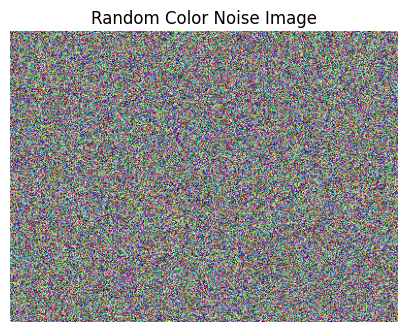

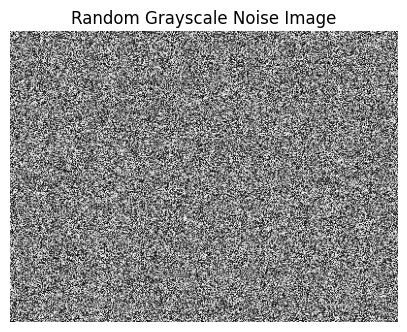

In [3]:
import matplotlib.pyplot as plt
# Define the dimensions of the images
width = 400
height = 300

# Calculate the total number of pixels
total_pixels = width * height

# Generate random noise for color image (3 channels)
color_image = np.random.randint(0, 256, (height, width, 3), dtype=np.uint8)

# Generate random noise for grayscale image (1 channel)
grayscale_image = np.random.randint(0, 256, (height, width), dtype=np.uint8)

# Display the color image
plt.figure(figsize=(5, 5))
plt.imshow(color_image)
plt.title('Random Color Noise Image')
plt.axis('off')
plt.show()

# Display the grayscale image
plt.figure(figsize=(5, 5))
plt.imshow(grayscale_image, cmap='gray')
plt.title('Random Grayscale Noise Image')
plt.axis('off')
plt.show()

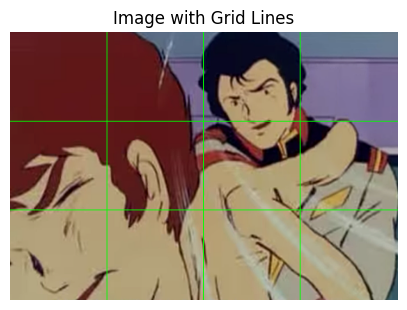

In [4]:
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
    """
    Crop the input image into a grid of smaller patches with grid lines drawn.
    
    Parameters:
    - img: The source image (numpy array).
    - num_horizontal_grid: Number of patches along the x-axis.
    - num_vertical_grid: Number of patches along the y-axis.
    - line_color: Color of the grid lines as a tuple (B, G, R).
    
    Returns:
    - img_with_grid: Image with grid lines drawn.
    """
    # Get image dimensions
    height, width = img.shape[:2]
    
    # Calculate grid line intervals
    horizontal_step = width // num_horizontal_grid
    vertical_step = height // num_vertical_grid
    
    # Create a copy of the image to draw grid lines on
    img_with_grid = img.copy()
    
    # Draw vertical grid lines
    for i in range(1, num_horizontal_grid):
        x = i * horizontal_step
        cv.line(img_with_grid, (x, 0), (x, height), line_color, 1)
    
    # Draw horizontal grid lines
    for i in range(1, num_vertical_grid):
        y = i * vertical_step
        cv.line(img_with_grid, (0, y), (width, y), line_color, 1)
    
    return img_with_grid

# Example usage:
if __name__ == "__main__":
    # Load an example image
    img = cv.imread("images/gundam.png")
    
    if img is None:
        print("Error: Unable to load image")
    else:
        # Define parameters for cropping grid
        num_horizontal_grid = 4
        num_vertical_grid = 3
        line_color = (0, 255, 0)  # Green color for grid lines
        
        # Crop and draw grid lines
        img_with_grid = crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)
        
        # Display the image with grids
        plt.figure(figsize=(5, 5))
        plt.imshow(cv.cvtColor(img_with_grid, cv.COLOR_BGR2RGB))
        plt.title('Image with Grid Lines')
        plt.axis('off')
        plt.show()